In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file
df = pd.read_csv('../data/job_postings_flat.csv')

# Quick look
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Analyst,"Summer Internship -Data Analyst Intern, Risk M...","Marlborough, MA",via Boatingrevealed.com,"Full-time, Part-time, and Internship",False,"New York, United States",1/1/2024 0:00,False,True,United States,NaN,NaN,NaN,BJ's Wholesale Club,['excel'],{'analyst_tools': ['excel']}
1,Data Analyst,"Staff Data Analyst Operations, Infrastructure ...","Fremont, CA",via ClimateTechList,Full-time,False,"California, United States",1/1/2024 0:00,True,False,United States,NaN,NaN,NaN,Tesla,"['tableau', 'flow']","{'analyst_tools': ['tableau'], 'other': ['flow']}"
2,Data Analyst,Junior Data Analyst - Entry Level,"Waco, TX",via ZipRecruiter,Full-time and Part-time,False,"Texas, United States",1/1/2024 0:00,True,False,United States,NaN,NaN,NaN,Next Recruiting,NaN,NaN
3,Data Analyst,"Data Analyst/Engineer, Supply Chain Optimizati...","Austin, TX",via ClimateTechList,Internship,False,"Texas, United States",1/1/2024 0:00,False,False,United States,NaN,NaN,NaN,Tesla,['spring'],{'libraries': ['spring']}
4,Data Scientist,It analyst,"Tampa, FL",via Talent.com,Full-time,False,"Florida, United States",1/1/2024 0:00,True,False,United States,NaN,NaN,NaN,VirtualVocations,NaN,NaN


In [129]:
# to renmove  via in the job_via column
df['job_via'] = df['job_via'].str.replace( r"\s*via\s*", "", case=False, regex=True)
df['job_via'] = df['job_via'].str.strip()
# Quick look
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Analyst,"Summer Internship -Data Analyst Intern, Risk M...","Marlborough, MA",Boatingrevealed.com,"Full-time, Part-time, and Internship",False,"New York, United States",1/1/2024 0:00,False,True,United States,NaN,NaN,NaN,BJ's Wholesale Club,['excel'],{'analyst_tools': ['excel']}
1,Data Analyst,"Staff Data Analyst Operations, Infrastructure ...","Fremont, CA",ClimateTechList,Full-time,False,"California, United States",1/1/2024 0:00,True,False,United States,NaN,NaN,NaN,Tesla,"['tableau', 'flow']","{'analyst_tools': ['tableau'], 'other': ['flow']}"
2,Data Analyst,Junior Data Analyst - Entry Level,"Waco, TX",ZipRecruiter,Full-time and Part-time,False,"Texas, United States",1/1/2024 0:00,True,False,United States,NaN,NaN,NaN,Next Recruiting,NaN,NaN
3,Data Analyst,"Data Analyst/Engineer, Supply Chain Optimizati...","Austin, TX",ClimateTechList,Internship,False,"Texas, United States",1/1/2024 0:00,False,False,United States,NaN,NaN,NaN,Tesla,['spring'],{'libraries': ['spring']}
4,Data Scientist,It analyst,"Tampa, FL",Talent.com,Full-time,False,"Florida, United States",1/1/2024 0:00,True,False,United States,NaN,NaN,NaN,VirtualVocations,NaN,NaN


In [130]:
# making sure that my column is only made of part time, full time, fulltime and part-time and internship
df["job_schedule_type"] = df["job_schedule_type"].astype(str).str.lower().str.strip()

df["job_schedule_type"] = df["job_schedule_type"].replace({

    r".*full.*time.*part.*time.*": "Full Time and Part Time",
    r".*full.*time.*contractor.*": "Full Time and Contractor",
    r".*part.*time.*contractor.*": "Part Time and Contractor",
    r".*full.*time.*intern.*": "Full Time and Internship",
    r".*contractor.*intern.*": "Contractor and Internship",
    r".*intern.*": "Internship",
    r".*full.*time.*": "Full Time",
    r".*part.*time.*": "Part Time",
    r".*contractor.*": "Contractor",
    r".*anywhere.*": "Remote",
    r".*remote.*": "Remote",

}, regex=True)

# Title case
df["job_schedule_type"] = df["job_schedule_type"].str.title()

# Allowed final categories
allowed_schedules = [
    "Full Time",
    "Full Time and Part Time",
    "Full Time and Contractor",
    "Contractor",
    "Part Time and Contractor",
    "Full Time and Internship",
    "Contractor and Internship",
    "Internship",
    "Part Time",
    "Remote"
]

# Filter out unwanted categories
df = df[df["job_schedule_type"].isin(allowed_schedules)]

# Quick look
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,"Staff Data Analyst Operations, Infrastructure ...","Fremont, CA",ClimateTechList,Full Time,False,"California, United States",1/1/2024 0:00,True,False,United States,NaN,NaN,NaN,Tesla,"['tableau', 'flow']","{'analyst_tools': ['tableau'], 'other': ['flow']}"
3,Data Analyst,"Data Analyst/Engineer, Supply Chain Optimizati...","Austin, TX",ClimateTechList,Internship,False,"Texas, United States",1/1/2024 0:00,False,False,United States,NaN,NaN,NaN,Tesla,['spring'],{'libraries': ['spring']}
4,Data Scientist,It analyst,"Tampa, FL",Talent.com,Full Time,False,"Florida, United States",1/1/2024 0:00,True,False,United States,NaN,NaN,NaN,VirtualVocations,NaN,NaN
5,Senior Data Scientist,"Senior Data Scientist, Growth",Anywhere,ZipRecruiter,Full Time,True,"California, United States",1/1/2024 0:00,False,True,United States,NaN,NaN,NaN,Atlassian,"['sql', 'python', 'r', 'c', 'tableau', 'micros...","{'analyst_tools': ['tableau', 'microstrategy',..."
6,Machine Learning Engineer,"Machine Learning Scientist, Prescient Design","San Ramon, CA",Monster,Full Time,False,"California, United States",1/1/2024 0:00,False,False,United States,NaN,NaN,NaN,Genentech,"['python', 'pytorch', 'github']","{'libraries': ['pytorch'], 'other': ['github']..."


In [131]:
# remove job_title column that was not yet cleaned to job_title_short
df = df.drop(columns=["job_title"], errors='ignore')

# Quick look
df.head()


,job_title_short,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,"Fremont, CA",ClimateTechList,Full Time,False,"California, United States",1/1/2024 0:00,True,False,United States,NaN,NaN,NaN,Tesla,"['tableau', 'flow']","{'analyst_tools': ['tableau'], 'other': ['flow']}"
3,Data Analyst,"Austin, TX",ClimateTechList,Internship,False,"Texas, United States",1/1/2024 0:00,False,False,United States,NaN,NaN,NaN,Tesla,['spring'],{'libraries': ['spring']}
4,Data Scientist,"Tampa, FL",Talent.com,Full Time,False,"Florida, United States",1/1/2024 0:00,True,False,United States,NaN,NaN,NaN,VirtualVocations,NaN,NaN
5,Senior Data Scientist,Anywhere,ZipRecruiter,Full Time,True,"California, United States",1/1/2024 0:00,False,True,United States,NaN,NaN,NaN,Atlassian,"['sql', 'python', 'r', 'c', 'tableau', 'micros...","{'analyst_tools': ['tableau', 'microstrategy',..."
6,Machine Learning Engineer,"San Ramon, CA",Monster,Full Time,False,"California, United States",1/1/2024 0:00,False,False,United States,NaN,NaN,NaN,Genentech,"['python', 'pytorch', 'github']","{'libraries': ['pytorch'], 'other': ['github']..."


In [132]:
# Remone the hours and remain with date only 
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"]).dt.date
# Quick look
df.head()

,job_title_short,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,"Fremont, CA",ClimateTechList,Full Time,False,"California, United States",2024-01-01,True,False,United States,NaN,NaN,NaN,Tesla,"['tableau', 'flow']","{'analyst_tools': ['tableau'], 'other': ['flow']}"
3,Data Analyst,"Austin, TX",ClimateTechList,Internship,False,"Texas, United States",2024-01-01,False,False,United States,NaN,NaN,NaN,Tesla,['spring'],{'libraries': ['spring']}
4,Data Scientist,"Tampa, FL",Talent.com,Full Time,False,"Florida, United States",2024-01-01,True,False,United States,NaN,NaN,NaN,VirtualVocations,NaN,NaN
5,Senior Data Scientist,Anywhere,ZipRecruiter,Full Time,True,"California, United States",2024-01-01,False,True,United States,NaN,NaN,NaN,Atlassian,"['sql', 'python', 'r', 'c', 'tableau', 'micros...","{'analyst_tools': ['tableau', 'microstrategy',..."
6,Machine Learning Engineer,"San Ramon, CA",Monster,Full Time,False,"California, United States",2024-01-01,False,False,United States,NaN,NaN,NaN,Genentech,"['python', 'pytorch', 'github']","{'libraries': ['pytorch'], 'other': ['github']..."


In [133]:
#Count how many job post are dont have hourly salary rate
df["salary_hour_avg"].isna().sum() + (df["salary_hour_avg"].astype(str).str.strip() == "").sum()
# Quick look
df.head()
print(
    df["salary_hour_avg"].isna().sum() +
    (df["salary_hour_avg"].astype(str).str.strip() == "").sum()
)

# Quick look
df.head()

437634


,job_title_short,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,"Fremont, CA",ClimateTechList,Full Time,False,"California, United States",2024-01-01,True,False,United States,NaN,NaN,NaN,Tesla,"['tableau', 'flow']","{'analyst_tools': ['tableau'], 'other': ['flow']}"
3,Data Analyst,"Austin, TX",ClimateTechList,Internship,False,"Texas, United States",2024-01-01,False,False,United States,NaN,NaN,NaN,Tesla,['spring'],{'libraries': ['spring']}
4,Data Scientist,"Tampa, FL",Talent.com,Full Time,False,"Florida, United States",2024-01-01,True,False,United States,NaN,NaN,NaN,VirtualVocations,NaN,NaN
5,Senior Data Scientist,Anywhere,ZipRecruiter,Full Time,True,"California, United States",2024-01-01,False,True,United States,NaN,NaN,NaN,Atlassian,"['sql', 'python', 'r', 'c', 'tableau', 'micros...","{'analyst_tools': ['tableau', 'microstrategy',..."
6,Machine Learning Engineer,"San Ramon, CA",Monster,Full Time,False,"California, United States",2024-01-01,False,False,United States,NaN,NaN,NaN,Genentech,"['python', 'pytorch', 'github']","{'libraries': ['pytorch'], 'other': ['github']..."


In [134]:
top_countries = df["job_location"].value_counts().head(7)
print (top_countries)

job_location
Anywhere                       58291
Singapore                       9229
New York, NY                    7885
United Kingdom                  6926
Bengaluru, Karnataka, India     5790
Paris, France                   5365
India                           4996
Name: count, dtype: int64


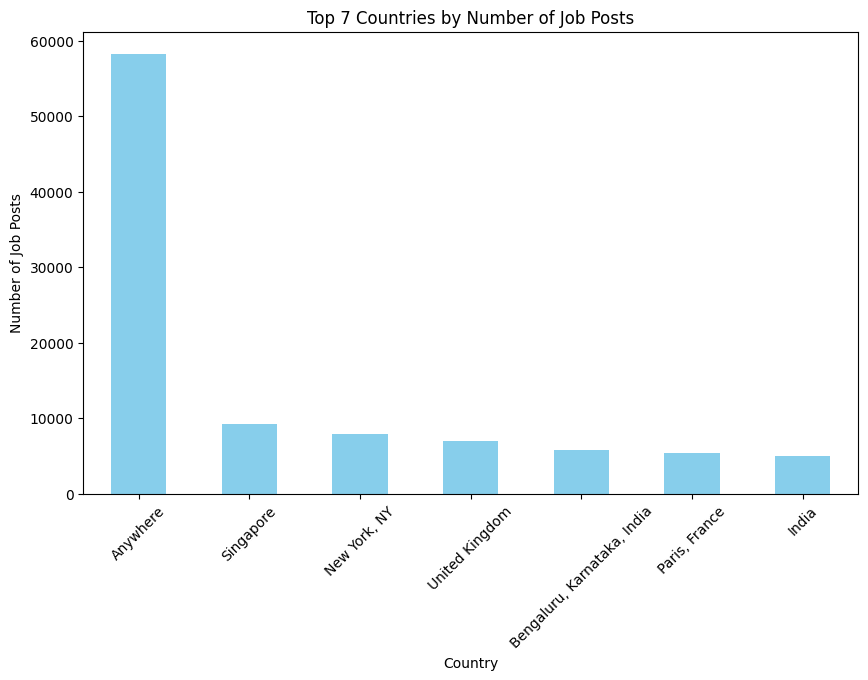

In [135]:
# Ploting the top 7 countries by number of job posts
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue')

plt.title("Top 7 Countries by Number of Job Posts")
plt.xlabel("Country")
plt.ylabel("Number of Job Posts")
plt.xticks(rotation=45)

plt.show()

In [136]:
target_jobs = df[df["job_title_short"].str.contains("Data Analyst", case=False, na=False)]
print(target_jobs)


            job_title_short           job_location          job_via  \
1              Data Analyst            Fremont, CA  ClimateTechList   
3              Data Analyst             Austin, TX  ClimateTechList   
8              Data Analyst             Dallas, TX       Talent.com   
10      Senior Data Analyst          United States            BeBee   
19             Data Analyst  Lower Saxony, Germany      Recruit.net   
...                     ...                    ...              ...   
478882         Data Analyst                  India            Shine   
478883         Data Analyst          Haatso, Ghana   LinkedIn Ghana   
478884         Data Analyst          Kitwe, Zambia             Jobs   
478886         Data Analyst            Puerto Rico         Sercanto   
478891         Data Analyst           Columbia, SC         LinkedIn   

       job_schedule_type  job_work_from_home            search_location  \
1              Full Time               False  California, United States 

In [137]:
# coverying the string list into a real python list
import ast

print("Columns in df:", df.columns)

if "job_skills" not in df.columns:
    raise KeyError("ERROR: job_skills column does NOT exist in df.")
# skipping  Rows that are not valid lists
def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

df["job_skills"] = df["job_skills"].apply(safe_eval)
# remove rows where the skill list is empty
df = df[df["job_skills"].apply(lambda x: isinstance(x, list) and len(x) > 0)]
# Explode the list
df_exploded = df.explode("job_skills")
# Remove  NaN values
df_exploded = df_exploded.dropna(subset=["job_skills"])
# counting the skills
skill_counts = df_exploded["job_skills"].value_counts()
print(skill_counts)
skill_counts.head()

Columns in df: Index(['job_title_short', 'job_location', 'job_via', 'job_schedule_type',
       'job_work_from_home', 'search_location', 'job_posted_date',
       'job_no_degree_mention', 'job_health_insurance', 'job_country',
       'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name',
       'job_skills', 'job_type_skills'],
      dtype='object')
job_skills
python      225869
sql         223158
aws          93252
azure        86999
tableau      67654
             ...  
workzone         2
fann             1
deno             1
esquisse         1
gtx              1
Name: count, Length: 247, dtype: int64


job_skills
python     225869
sql        223158
aws         93252
azure       86999
tableau     67654
Name: count, dtype: int64

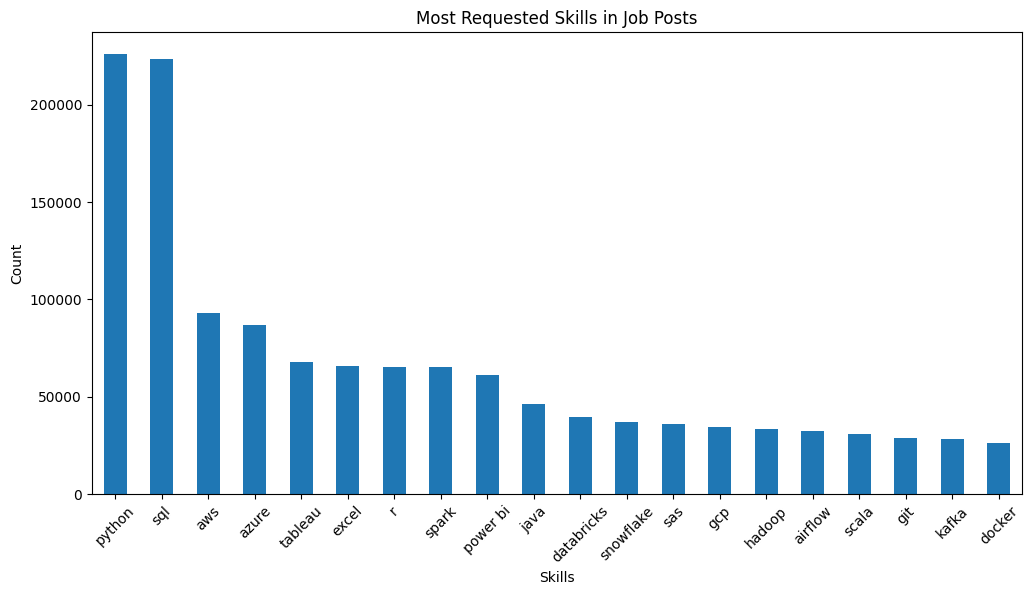

In [138]:
#plot a graph for the highrest 10 skills required
skill_counts.head(20).plot(kind="bar", figsize=(12,6))
plt.title("Most Requested Skills in Job Posts")
plt.xlabel("Skills")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [139]:
# Getting the count of jobs in each platform 
job_via_counts = df["job_via"].value_counts()
print(job_via_counts)

job_via
LinkedIn                    146724
BeBee                        37662
Indeed                       28592
ZipRecruiter                 11214
Jooble                        8283
                             ...  
Swooped                          1
Spacetoon Go Career Site         1
Imaginary Cloud                  1
Axiansdc.catsone.com             1
Jobs At Kaso - Personio          1
Name: count, Length: 5656, dtype: int64


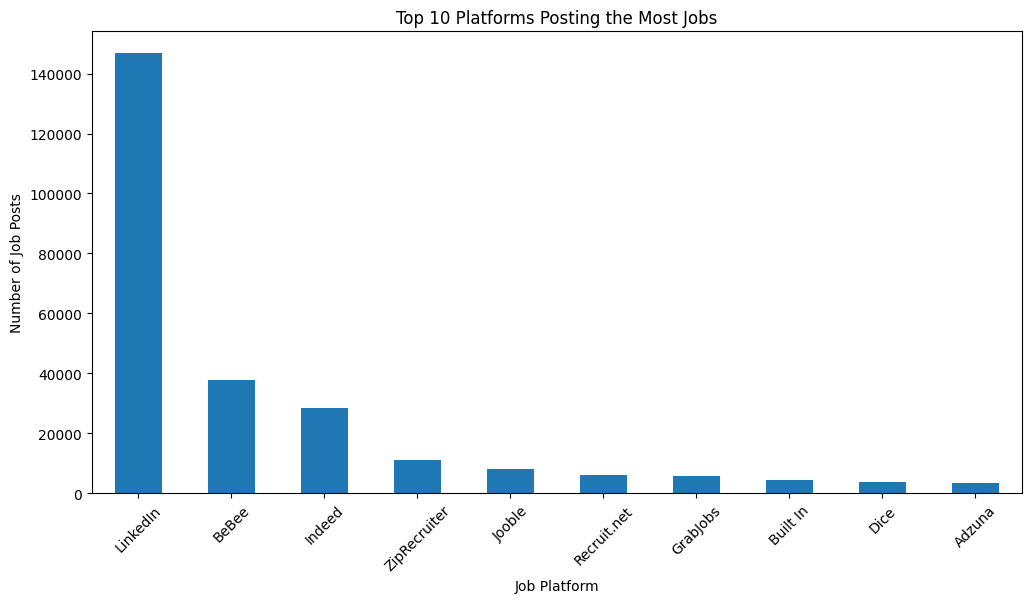

In [140]:
# ploting a bar chart to show the platforms with the highest number of job posting
import matplotlib.pyplot as plt

top_platforms = df["job_via"].value_counts().head(10)

plt.figure(figsize=(12,6))
top_platforms.plot(kind="bar")

plt.title("Top 10 Platforms Posting the Most Jobs")
plt.xlabel("Job Platform")
plt.ylabel("Number of Job Posts")
plt.xticks(rotation=45)

plt.show()


In [141]:
# make the saraly_hour_avg column numeric
df["salary_hour_avg"] = pd.to_numeric(df["salary_hour_avg"], errors="coerce")

# Get the average salary per hour for every job title
salary_by_job = (
    df.groupby("job_title_short")["salary_hour_avg"]
      .mean()
      .sort_values(ascending=False)
)
print(salary_by_job)

job_title_short
Cloud Engineer               71.238750
Senior Data Engineer         64.584694
Machine Learning Engineer    61.562763
Data Engineer                60.160590
Senior Data Scientist        58.236912
Software Engineer            57.377080
Senior Data Analyst          56.344335
Data Scientist               48.826280
Business Analyst             48.116700
Data Analyst                 44.255000
Name: salary_hour_avg, dtype: float64


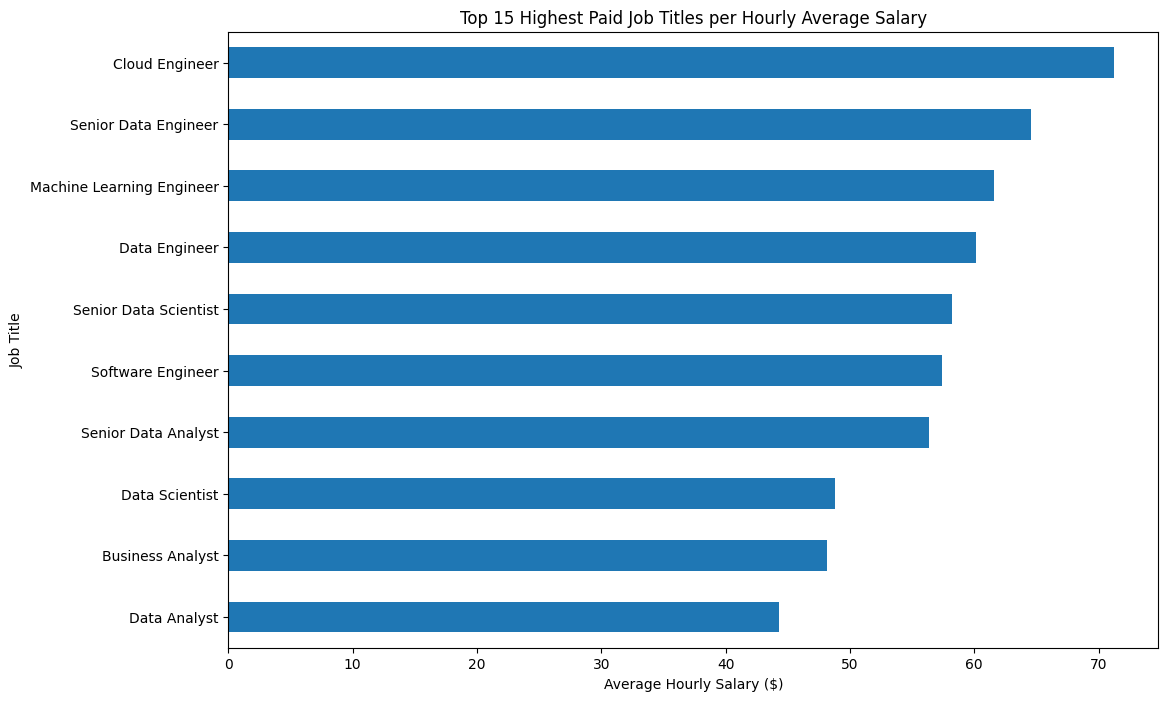

In [142]:
#plot a graph to show the most high paying job titles
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

salary_by_job.head(15).plot(kind="barh")

plt.title("Top 15 Highest Paid Job Titles per Hourly Average Salary")
plt.xlabel("Average Hourly Salary ($)")
plt.ylabel("Job Title")

plt.gca().invert_yaxis()   # highest salary at top
plt.show()

In [143]:
# making sure that job_no_degree_mention is boolean
df["job_no_degree_mention"] = df["job_no_degree_mention"].astype(bool)

# Grouping by job title and counting the mentions of no degree requirement
degree_counts = (
    df.groupby("job_title_short")["job_no_degree_mention"]
      .value_counts()
      .unstack(fill_value=0)
)
print(degree_counts)

job_no_degree_mention      False  True 
job_title_short                        
Business Analyst           15461   5002
Cloud Engineer              2495   2153
Data Analyst               54130  28905
Data Engineer              58380  51817
Data Scientist             70379   4564
Machine Learning Engineer  10509    314
Senior Data Analyst         7941   4247
Senior Data Engineer       14024  12910
Senior Data Scientist      16694   1113
Software Engineer           9880   9173


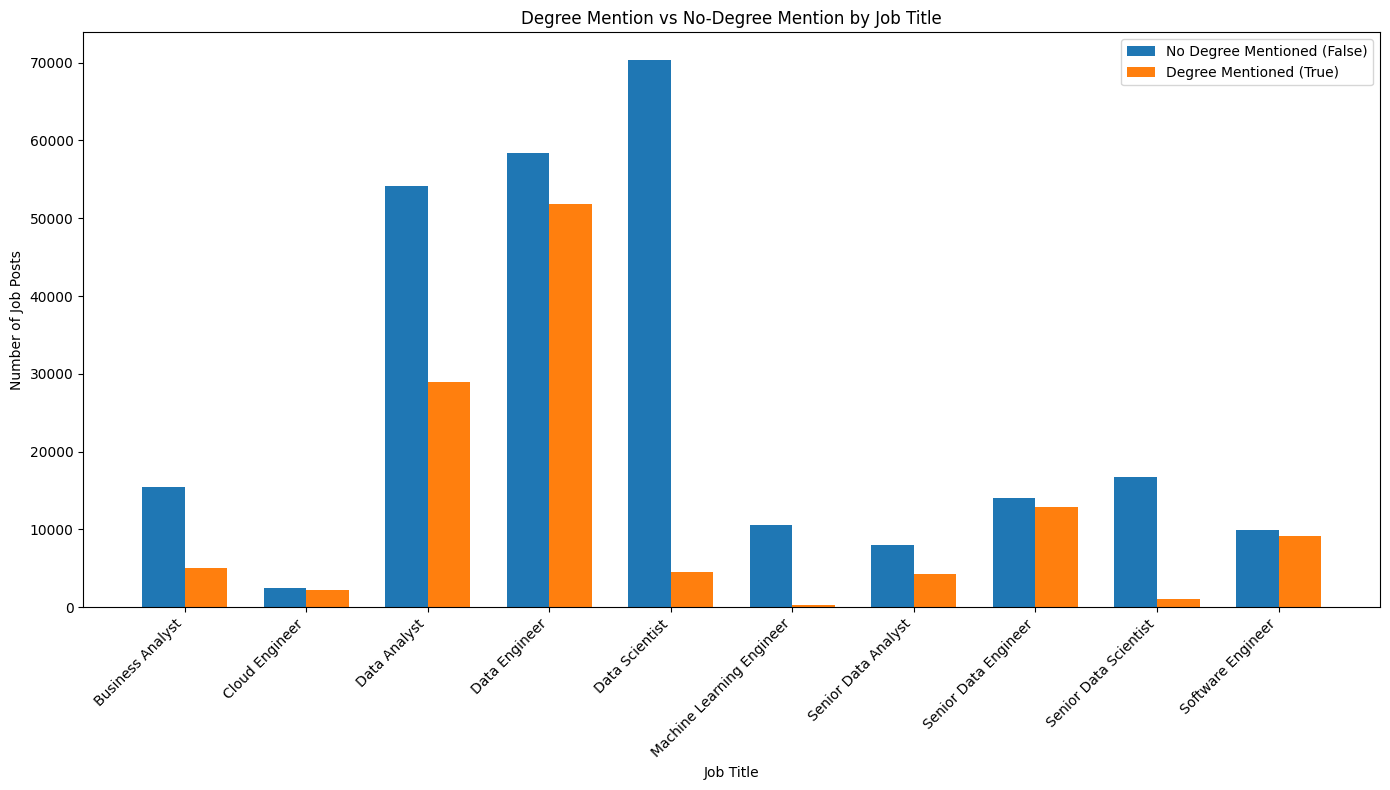

In [144]:
# plotting a bar chart to show the top 15 job titles that require a degree
import matplotlib.pyplot as plt
import numpy as np

# Use the table you already created
plot_data = degree_counts.copy()

# Create positions
x = np.arange(len(plot_data))  # number of job titles
width = 0.35  # width of each bar

plt.figure(figsize=(14, 8))

# Plot the two bar sets
plt.bar(x - width/2, plot_data[False], width, label="No Degree Mentioned (False)")
plt.bar(x + width/2, plot_data[True], width, label="Degree Mentioned (True)")

# Add labels and formatting
plt.xlabel("Job Title")
plt.ylabel("Number of Job Posts")
plt.title("Degree Mention vs No-Degree Mention by Job Title")

plt.xticks(x, plot_data.index, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


In [145]:
# making sure salary is in numeric format
df["salary_hour_avg"] = pd.to_numeric(df["salary_hour_avg"], errors="coerce")
df["job_schedule_type"] = df["job_schedule_type"].astype(str).str.strip().str.title()



In [147]:
# Group and compute average salary per scheduke type
salary_by_schedule = (
    df.groupby("job_schedule_type")["salary_hour_avg"]
      .mean()
      .sort_values(ascending=False)
)
df = df.dropna(subset=["salary_hour_avg"])

# Remove specific unwanted categories
unwanted = [
    "per diem",
    "temp work and per diem",
    "temp work and volunteer",
    "volunteer"
]

df = df[~df["job_schedule_type"].isin(unwanted)]
print(salary_by_schedule)

job_schedule_type
Contractor    57.149649
Full Time     45.207379
Part Time     41.095903
Internship    25.003471
Name: salary_hour_avg, dtype: float64


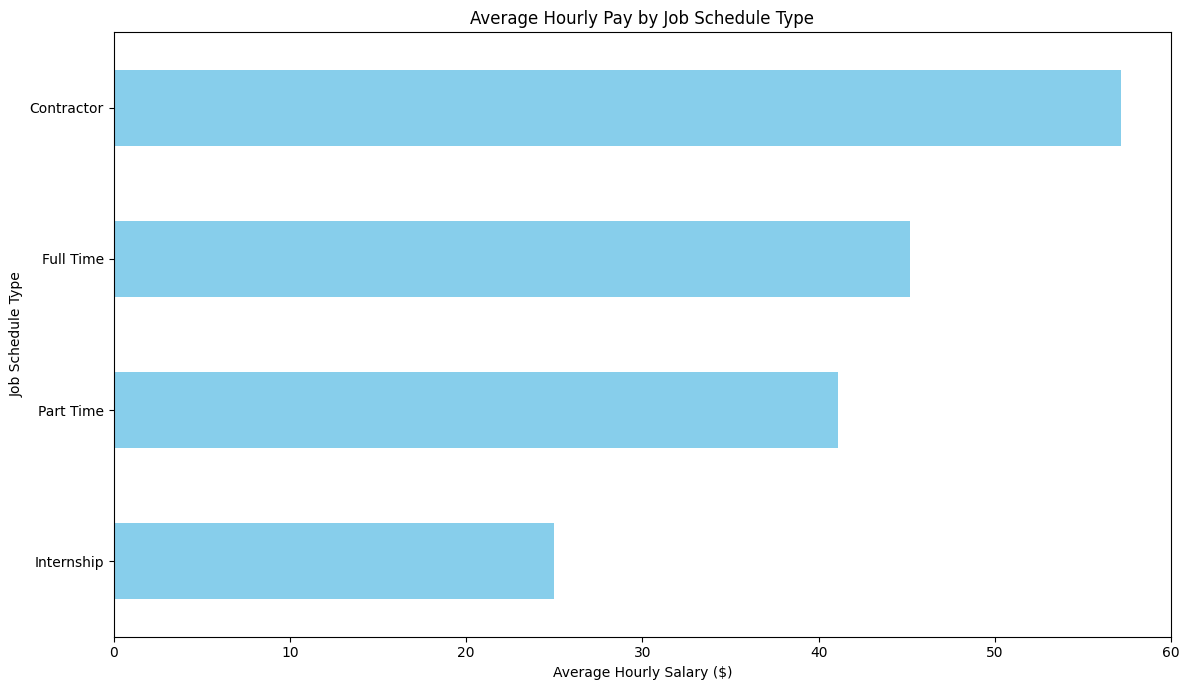

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

salary_by_schedule.plot(kind="barh", color="skyblue")

plt.title("Average Hourly Pay by Job Schedule Type")
plt.xlabel("Average Hourly Salary ($)")
plt.ylabel("Job Schedule Type")

plt.gca().invert_yaxis()  # highest salary first
plt.tight_layout()
plt.show()

In [152]:
# grouping by job title and getting min, mean and max salary
salary_stats = (
    df.groupby("job_title_short")["salary_hour_avg"]
      .agg(["min", "mean", "max"])
      .sort_values("mean", ascending=False)
)
print(salary_stats)

                              min       mean         max
job_title_short                                         
Cloud Engineer             18.820  71.238750  160.000000
Senior Data Engineer        9.000  64.584694  117.239998
Machine Learning Engineer  15.000  61.562763  220.000000
Data Engineer               9.000  60.160590  221.000000
Senior Data Scientist      21.000  58.236912  175.000000
Software Engineer          15.000  57.377080   92.500000
Senior Data Analyst        15.245  56.344335  115.000000
Data Scientist              9.000  48.826280  250.000000
Business Analyst           13.285  48.116700  105.639999
Data Analyst               10.000  44.255000  140.000000


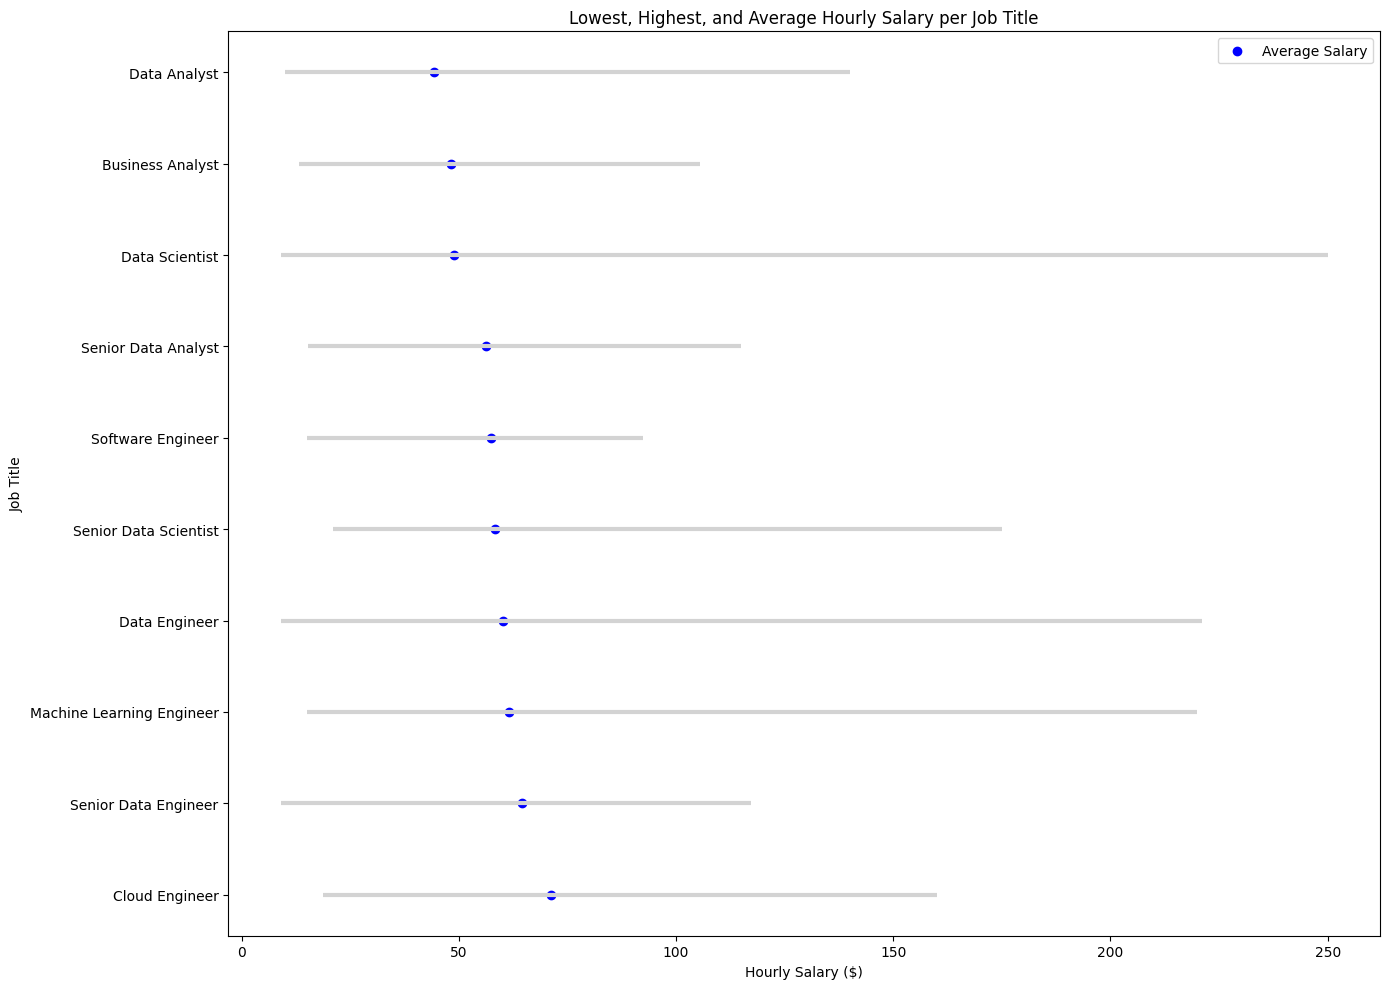

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Plot min-max ranges (horizontal lines)
plt.hlines(
    y=salary_stats.index,
    xmin=salary_stats["min"],
    xmax=salary_stats["max"],
    color="lightgray",
    linewidth=3
)

# Plot average as a dot
plt.scatter(
    salary_stats["mean"],
    salary_stats.index,
    color="blue",
    label="Average Salary"
)

plt.title("Lowest, Highest, and Average Hourly Salary per Job Title")
plt.xlabel("Hourly Salary ($)")
plt.ylabel("Job Title")
plt.legend()
plt.tight_layout()
plt.show()